Categories of problems
1. time lag
    +6 min
    -6 min
    larger than 6 min
    smaller than -6 min
2. Vertical offset after time correction of 10 or more points
    +1 cm
    -1 cm
    +5 mm
    -5 mm
3. repeated points
    doccument how many?
4. NOAA gap fill
    any gap that NOAA has filled 30+ min

In [124]:
import pandas as pd # Use the work with the dataframes
import numpy as np  # Mainly use to assing nan values as np.nan
import matplotlib.pyplot as plt # Visualitzation
from matplotlib.ticker import MaxNLocator # Visualitzation
import statistics  # Uses to compute statistics
import os
import scipy.interpolate
from collections import Counter
import matplotlib.dates as mdates


In [125]:
p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
p21_9300_LH.drop(labels=range(701280,701286),axis = 0, inplace = True)
p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
p21_0112_LH.drop(labels=range(1051920,1051926), axis = 0, inplace=True)
p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')
p21_1323_LH.drop(labels=range(len(p21_1323_LH)-6,len(p21_1323_LH)), axis=0, inplace=True)


/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_31446/2121313406.py:1: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_9300_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_1993-2000_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_31446/2121313406.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_0112_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2001-2012_pwl_harmwl_bwl.csv')
/var/folders/y3/cr8y1g617l16hvdtqnqzmgz80000gn/T/ipykernel_31446/2121313406.py:5: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p21_1323_LH = pd.read_csv(r'/Users/rprocious/Downloads/data/lighthouse/Pier 21/Pier21_2013-2023_pwl_harmwl_bwl.csv')


In [126]:
directory_path = '/Users/rprocious/Downloads/data/NOAA/pier21/'

dataframes = []

# Loop through the files in the directory
for filename in sorted(os.listdir(directory_path)):
    if filename.endswith('level.csv'):

        file_path = os.path.join(directory_path, filename)
        
        
        df = pd.read_csv(file_path)
        
        dataframes.append(df)

p21_NOAA = pd.concat(dataframes, ignore_index=True)

In [127]:
frames = [p21_9300_LH,p21_0112_LH,p21_1323_LH]
p21_LH = pd.concat(frames, ignore_index=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1993 0000,1.491,1.733,1.453
1,01-01-1993 0006,1.491,NaN,1.456
2,01-01-1993 0012,1.496,NaN,1.458
3,01-01-1993 0018,1.503,NaN,1.461
4,01-01-1993 0024,1.512,NaN,1.464


In [128]:
p21_NOAA.head()

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
0,Error: No data was found. This product may not...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Error: No data was found. This product may not...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Error: No data was found. This product may not...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-01-01 00:00,1.634,0.001,0.0,0.0,0.0,0.0,v
4,1996-01-01 00:06,1.648,0.001,0.0,0.0,0.0,0.0,v


In [129]:
p21_NOAA.drop(labels=range(0,3), axis = 0,inplace=True)
p21_NOAA.reset_index(drop = True, inplace=True)

In [130]:
p21_NOAA.head()

,Date Time,Water Level,Sigma,O or I (for verified),F,R,L,Quality
0,1996-01-01 00:00,1.634,0.001,0.0,0.0,0.0,0.0,v
1,1996-01-01 00:06,1.648,0.001,0.0,0.0,0.0,0.0,v
2,1996-01-01 00:12,1.657,0.001,0.0,0.0,0.0,0.0,v
3,1996-01-01 00:18,1.664,0.001,0.0,0.0,0.0,0.0,v
4,1996-01-01 00:24,1.654,0.001,0.0,0.0,0.0,0.0,v


In [131]:
p21_LH.drop(labels=range(0,262800),axis=0, inplace=True)
p21_LH.reset_index(drop=True, inplace=True)
p21_LH.head()

,#date+time,022-pwl,022-bwl,022-harmwl
0,01-01-1996 0000,1.634,1.911,1.550
1,01-01-1996 0006,1.648,NaN,1.549
2,01-01-1996 0012,1.657,NaN,1.547
3,01-01-1996 0018,1.664,NaN,1.546
4,01-01-1996 0024,1.654,NaN,1.545


In [132]:
comparison_df = pd.DataFrame()
comparison_df['Dates'] = p21_LH['#date+time']
comparison_df['Lighthouse WL'] = p21_LH['022-pwl']
comparison_df['NOAA WL'] = p21_NOAA[' Water Level']
comparison_df.head(10)

,Dates,Lighthouse WL,NOAA WL
0,01-01-1996 0000,1.634,1.634
1,01-01-1996 0006,1.648,1.648
2,01-01-1996 0012,1.657,1.657
3,01-01-1996 0018,1.664,1.664
4,01-01-1996 0024,1.654,1.654
5,01-01-1996 0030,1.647,1.647
6,01-01-1996 0036,1.66,1.660
7,01-01-1996 0042,1.655,1.655
8,01-01-1996 0048,1.652,1.652
9,01-01-1996 0054,1.627,1.627


In [133]:
comparison_df[438476:438487]

,Dates,Lighthouse WL,NOAA WL
438476,12-31-2000 2336,1.498,1.498
438477,12-31-2000 2342,1.505,1.505
438478,12-31-2000 2348,1.516,1.516
438479,12-31-2000 2354,1.517,1.517
438480,01-01-2001 0000,1.523,1.523
438481,01-01-2001 0006,1.535,1.535
438482,01-01-2001 0012,1.547,1.547
438483,01-01-2001 0018,1.547,1.547
438484,01-01-2001 0024,1.558,1.558
438485,01-01-2001 0030,1.568,1.568


In [134]:
comparison_df['Dates'] = pd.to_datetime(comparison_df['Dates'])
comparison_df['Lighthouse WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['NOAA WL'].replace([-999, -99, 99, 'NA', 'RM'], np.nan, inplace=True)
comparison_df['Lighthouse WL'] = pd.to_numeric(comparison_df['Lighthouse WL'],errors= 'coerce')
comparison_df['NOAA WL'] = pd.to_numeric(comparison_df['NOAA WL'],errors='coerce')
comparison_df.tail()

,Dates,Lighthouse WL,NOAA WL
2454475,2023-12-31 23:30:00,1.547,1.548
2454476,2023-12-31 23:36:00,1.548,1.542
2454477,2023-12-31 23:42:00,1.542,1.553
2454478,2023-12-31 23:48:00,1.553,1.579
2454479,2023-12-31 23:54:00,1.579,1.580


(1.0, 2.0)

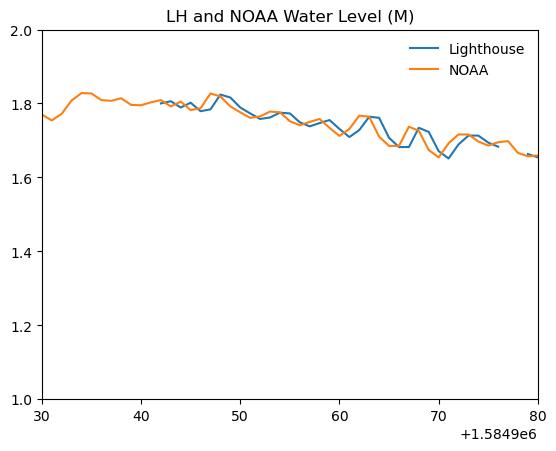

In [177]:
plt.plot(comparison_df['Lighthouse WL'], label = 'Lighthouse')

plt.plot(comparison_df['NOAA WL'], label = 'NOAA')
plt.title('LH and NOAA Water Level (M)')
plt.legend(frameon= False)
plt.xlim(1584930,1584980)
plt.ylim(1,2)

In [139]:
for i in range(len(comparison_df)):
    if comparison_df.loc[i]['Lighthouse WL'] != comparison_df.loc[i]['NOAA WL']:
        print(comparison_df.loc[i]['Dates'])
        break


1996-04-23 00:54:00


In [140]:
#function to find the index of a date range
def date_index_locater(start_date,end_date):
    indices = []
# Filter rows by date range
    date_range_filter = (comparison_df['Dates'] >= start_date) & (comparison_df['Dates'] <= end_date)

# Get the indices of the rows within the date range
    indices = (comparison_df[date_range_filter].index.tolist())

    return(indices)


In [182]:
comparison_df[1584937:1584947]

,Dates,Lighthouse WL,NOAA WL
1584937,2014-01-29 21:42:00,NaN,1.807
1584938,2014-01-29 21:48:00,NaN,1.814
1584939,2014-01-29 21:54:00,NaN,1.796
1584940,2014-01-29 22:00:00,NaN,1.795
1584941,2014-01-29 22:06:00,NaN,1.803
1584942,2014-01-29 22:12:00,1.800,1.809
1584943,2014-01-29 22:18:00,1.806,1.792
1584944,2014-01-29 22:24:00,1.789,1.805
1584945,2014-01-29 22:30:00,1.802,1.782
1584946,2014-01-29 22:36:00,1.779,1.787


Data coming back in from lighthouse looks to be off by 6 min and 0.003M offset